In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install tensorflow==1.15

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
%cd /content/gdrive/MyDrive/a/
data = pd.read_csv('mnist_train.csv')
data

/content/gdrive/MyDrive/a


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data = data.values
data.shape

(60000, 785)

In [6]:
train_x = data[:, 1:]
train_y = []

In [7]:
for i in data[:, 0]:
    y = [0]*10
    y[i] = 1
    train_y.append(y)

train_y = np.array(train_y)
print(train_x.shape, train_y.shape)


(60000, 784) (60000, 10)


In [8]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.1)

train_x= np.array(train_x)
train_y=np.array(train_y)
test_y = np.array(test_y)
test_x = np.array(test_x)

In [9]:
X = tf.placeholder(shape=(None,784), dtype=tf.float32, name = 'x')
y = tf.placeholder(shape=(None, 10), dtype=tf.float32)

In [10]:
weight_initer = tf.truncated_normal_initializer(mean=0.0, stddev=0.01)
weights = { 
    'w1': tf.get_variable(name="w1", dtype=tf.float32, shape=[784, 128], initializer=weight_initer),
    'w2': tf.get_variable(name="w2", dtype=tf.float32, shape=[128, 64], initializer=weight_initer),
    'w3': tf.get_variable(name="w3", dtype=tf.float32, shape=[64, 32], initializer=weight_initer),
    'w4': tf.get_variable(name="w4", dtype=tf.float32, shape=[32, 10], initializer=weight_initer),
}

biases = {
    'b1': tf.get_variable(name="b1", dtype=tf.float32, shape=[128], initializer=weight_initer),
    'b2': tf.get_variable(name="b2", dtype=tf.float32, shape=[64], initializer=weight_initer),
    'b3': tf.get_variable(name="b3", dtype=tf.float32, shape=[32], initializer=weight_initer),
    'b4': tf.get_variable(name="b4", dtype=tf.float32, shape=[10], initializer=weight_initer),
}

In [11]:
def net(x, weights, biases):
    dense_1 = tf.matmul(x, weights['w1'])+biases['b1']
    relu_1 = tf.nn.relu(dense_1)
    dense_2 = tf.matmul(relu_1, weights['w2'])+biases['b2']
    relu_2 = tf.nn.relu(dense_2)
    dense_3 = tf.matmul(relu_2, weights['w3'])+biases['b3']
    relu_3 = tf.nn.relu(dense_3)
    dense_4 = tf.matmul(relu_3, weights['w4'])+biases['b4']
    return dense_4

In [12]:
pred = net(X, weights, biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [13]:
epochs = 10
batch_size = 128

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
losses = []
acc =[]

In [15]:
for i in range(epochs):

    for j in range(len(train_x)//batch_size):
        batch_x = train_x[j*batch_size:min((j+1)*batch_size, len(train_x))]
        batch_y = train_y[j*batch_size:min((j+1)*batch_size, len(train_y))]

        opt = sess.run(optimizer, feed_dict={X: batch_x, y: batch_y})
        l, a = sess.run([loss, accuracy], feed_dict={X: test_x, y: test_y})
    
    print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(l) + ", Training Accuracy= " + \
                      "{:.5f}".format(a))
    losses.append(l)
    acc.append(a)

Iter 0, Loss= 0.185287, Training Accuracy= 0.94600
Iter 1, Loss= 0.127146, Training Accuracy= 0.96233
Iter 2, Loss= 0.112438, Training Accuracy= 0.96817
Iter 3, Loss= 0.116635, Training Accuracy= 0.96583
Iter 4, Loss= 0.115922, Training Accuracy= 0.96483
Iter 5, Loss= 0.146862, Training Accuracy= 0.95833
Iter 6, Loss= 0.115981, Training Accuracy= 0.96717
Iter 7, Loss= 0.128439, Training Accuracy= 0.96667
Iter 8, Loss= 0.123720, Training Accuracy= 0.97000
Iter 9, Loss= 0.138358, Training Accuracy= 0.96833


In [17]:
from tensorflow.train import Saver

In [18]:
save = Saver()

In [19]:
save.save(sess, 'model_mnist/model.ckpt')

'model_mnist/model.ckpt'

In [20]:
import matplotlib.pyplot as plt

9


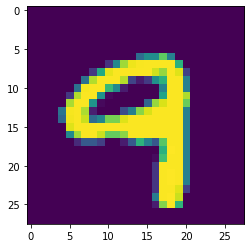

In [21]:
img_test = data[22390, 1:]
img_test = img_test.reshape(1, 784)
p = sess.run(pred, feed_dict={X:img_test})[0]
print(np.argmax(p))
img_test = img_test.reshape(28, 28)
plt.imshow(img_test)

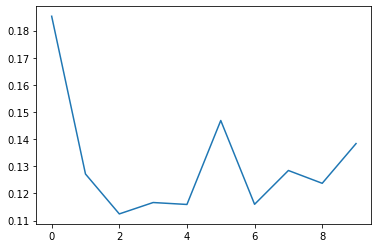

In [22]:
plt.plot(losses)

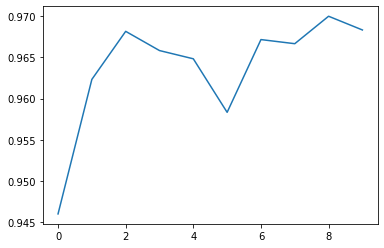

In [23]:
plt.plot(acc)